# **Machine Learning Project - Zomato Restaurant Rating Prediction :**
- ### Write a program that takes in data on restaurants and their reviews as input and uses machine learning algorithms to predict restaurant ratings. The program should be able to handle various factors about the restaurant, such as cuisine type, location, price range, and reviews.
- ### Your task is to choose multiple machine learning algorithms and compare their accuracy in predicting restaurant ratings. You can use metrics such as mean squared error or R-squared value to evaluate the performance of each model.
---
- ## Importing required modules :


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Loading the dataset :

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/ML Projects/Datasets/zomato_bang.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Checking the details of the dataset :

In [5]:
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


## Calculating null values :

In [4]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


## Removing rows where the **'cuisines'** column has missing values :

In [9]:
df = df[df.cuisines.isna() == False]
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7741
votes,0
phone,1179
location,0
rest_type,206



## **Below columns contain information that is not relevant to restaurant ratings, or could potentially introduce bias. For example :**
---
- ### **URL, address, and phone** : These are unique identifiers for each restaurant and do not have any inherent relationship with the rating.
- ### **listed_in(city) :** All restaurants are in the same city (Bangalore), so this column does not provide any useful information for the model.
- ### Removing these columns helps the model focus on the features that actually matter, such as **cuisine type, location, price range**, and **reviews**, which can lead to more accurate predictions.

In [ ]:
df.drop(columns = ["url","address","phone","listed_in(city)"], inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51672 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51672 non-null  object
 1   online_order                 51672 non-null  object
 2   book_table                   51672 non-null  object
 3   rate                         43931 non-null  object
 4   votes                        51672 non-null  int64 
 5   location                     51672 non-null  object
 6   rest_type                    51466 non-null  object
 7   dish_liked                   23639 non-null  object
 8   cuisines                     51672 non-null  object
 9   approx_cost(for two people)  51352 non-null  object
 10  reviews_list                 51672 non-null  object
 11  menu_item                    51672 non-null  object
 12  listed_in(type)              51672 non-null  object
dtypes: int64(1), object(12)
memory usage

## Renaming Columns :

In [15]:
df.rename(columns = {'approx_cost(for two people)': 'average_cost'}, inplace = True)
df.rename(columns = {'listed_in(type)': 'listed_type'}, inplace = True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51672 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51672 non-null  object
 1   online_order  51672 non-null  object
 2   book_table    51672 non-null  object
 3   rate          43931 non-null  object
 4   votes         51672 non-null  int64 
 5   location      51672 non-null  object
 6   rest_type     51466 non-null  object
 7   dish_liked    23639 non-null  object
 8   cuisines      51672 non-null  object
 9   average_cost  51352 non-null  object
 10  reviews_list  51672 non-null  object
 11  menu_item     51672 non-null  object
 12  listed_type   51672 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.5+ MB


## Finding out top 5 most frequent restaurant names in the dataframe :

In [17]:
df.name.value_counts().head()

,count
name,
Cafe Coffee Day,96
Onesta,85
Just Bake,73
Empire Restaurant,71
Five Star Chicken,70


## Calculating the percentage of the total orders for each of the top 5 most frequent restaurants and formatting the output as a percentage :

In [23]:
# Calculating the count of occurrences for each restaurant :
restaurant_counts = df['name'].value_counts()

# Calculating the total number of orders :
total_orders = len(df)

# Calculating the percentage for the top 5 restaurants :
top_5_restaurants_percentage = (restaurant_counts.head() / total_orders) * 100

# Formatting the output as percentages :
formatted_percentages = top_5_restaurants_percentage.apply(lambda x: f'{x:.2f}%')

# Displaying the result :
print(formatted_percentages)

name
Cafe Coffee Day      0.19%
Onesta               0.16%
Just Bake            0.14%
Empire Restaurant    0.14%
Five Star Chicken    0.14%
Name: count, dtype: object


### So we can see : The top 5 restaurants in the dataset represent a very small fraction of the total orders, with **'Cafe Coffee Day'** having the highest percentage at just 0.19%.
---
# Counting the number of online and offline orders from the dataframe :
- ### Below code first filters the DataFrame df to select rows where the **online_order** column is '**Yes**' and counts the number of rows using **shape[0]**. It then repeats the process for '**No**' to get the number of offline orders. Finally, it prints the counts for both online and offline orders.

In [24]:
online_orders = df[df['online_order'] == 'Yes'].shape[0]
offline_orders = df[df['online_order'] == 'No'].shape[0]

print(f'Online orders: {online_orders}')
print(f'Offline orders: {offline_orders}')

Online orders: 30428
Offline orders: 21244


## Visualizing the data :

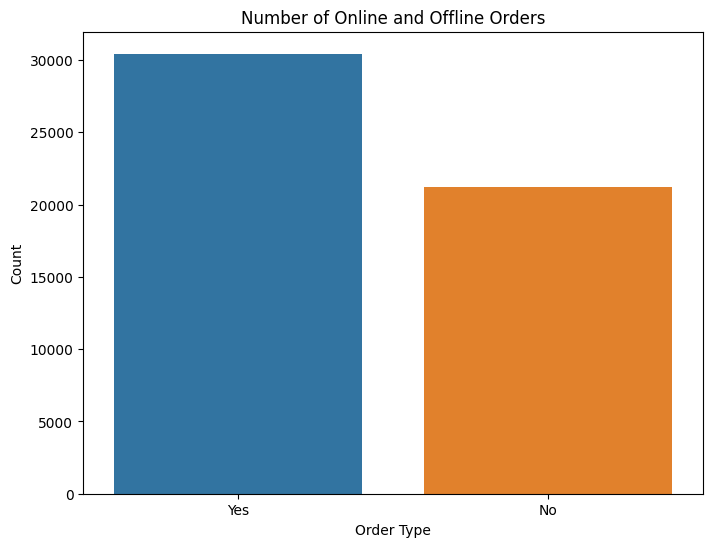

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='online_order', data = df, hue = 'online_order')
plt.title('Number of Online and Offline Orders')
plt.xlabel('Order Type')
plt.ylabel('Count')
plt.show()

## Calculating and formatting the percentage of **online** and **offline** orders from the dataframe :

In [35]:
# Calculating the count of occurrences for each order type:
order_counts = df['online_order'].value_counts()

# Calculating the total number of orders:
total_orders = len(df)

# Calculating the percentage for each order type:
order_percentages = (order_counts / total_orders) * 100

# Formatting the output as percentages:
formatted_percentages = order_percentages.apply(lambda x: f'{x:.2f}%')

# Displaying the result :
print(formatted_percentages)

online_order
Yes    58.89%
No     41.11%
Name: count, dtype: object


### This means that the majority of orders are placed online.
---
## Dropping few more columns which are not important for making prediction :

In [37]:
df.drop(columns = ['dish_liked','reviews_list','menu_item','listed_type'], inplace = True)

In [38]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600


In [41]:
# Replacing commas with an empty string in the 'cuisines' column of the DataFrame 'df' :

df['cuisines'] = df['cuisines'].str.replace(',','')

# Converting the entire 'cuisines' column datatype to string > then we are splitting the string into
# individual cuisine type and converting them into a list > then we are sorting them alphabetically > then
# we are joining the sorted list back into a string with a space - ' '.

df['cuisines'] = df['cuisines'].astype(str).apply(lambda x : ' '.join(sorted(x.split())))

## Now below we can see the counts for each individual cuisine type :

In [42]:
df['cuisines'].value_counts()

,count
cuisines,
Indian North,2913
Chinese Indian North,2800
Indian South,1828
Chinese Indian Indian North South,1478
Bakery Desserts,1114
...,...
American Asian Biryani Continental Mediterranean Salad,1
Chinese Indian Indian Mughlai North Seafood South,1
Chinese Malaysian Seafood Thai,1


## Converting text values in the **'location', 'rest_type'**, and **'cuisines'** columns into numerical labels for machine learning :

In [43]:
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
df['rest_type'] = le.fit_transform(df['rest_type'])
df['cuisines'] = le.fit_transform(df['cuisines'])

In [44]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,Yes,Yes,4.1/5,775,1,27,1421,800
1,Spice Elephant,Yes,No,4.1/5,787,1,27,1434,800
2,San Churro Cafe,Yes,No,3.8/5,918,1,22,1204,800
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,1,78,1791,300
4,Grand Village,No,No,3.8/5,166,4,27,1837,600


In [45]:
df['location'].value_counts()

,count
location,
0,5124
22,2523
45,2504
29,2233
89,2136
...,...
88,6
91,6
30,3


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51672 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51672 non-null  object
 1   online_order  51672 non-null  object
 2   book_table    51672 non-null  object
 3   rate          43931 non-null  object
 4   votes         51672 non-null  int64 
 5   location      51672 non-null  int64 
 6   rest_type     51672 non-null  int64 
 7   cuisines      51672 non-null  int64 
 8   average_cost  51352 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.9+ MB


## Removing commas from the **'average_cost'** column and converts it to a float data type :

In [47]:
df['average_cost'] = df['average_cost'].str.replace(",","")
df['average_cost'] = df['average_cost'].astype('float')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51672 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51672 non-null  object 
 1   online_order  51672 non-null  object 
 2   book_table    51672 non-null  object 
 3   rate          43931 non-null  object 
 4   votes         51672 non-null  int64  
 5   location      51672 non-null  int64  
 6   rest_type     51672 non-null  int64  
 7   cuisines      51672 non-null  int64  
 8   average_cost  51352 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 3.9+ MB


## So now as we can see the datatype of column **'average_cost'** is float.

In [49]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,Yes,Yes,4.1/5,775,1,27,1421,800.0
1,Spice Elephant,Yes,No,4.1/5,787,1,27,1434,800.0
2,San Churro Cafe,Yes,No,3.8/5,918,1,22,1204,800.0
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,1,78,1791,300.0
4,Grand Village,No,No,3.8/5,166,4,27,1837,600.0


## Transforming the **'online_order'** and **'book_table'** columns into numerical labels using LabelEncoder :

In [50]:
df['online_order'] = le.fit_transform(df['online_order'])
df['book_table'] = le.fit_transform(df['book_table'])

In [51]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1/5,775,1,27,1421,800.0
1,Spice Elephant,1,0,4.1/5,787,1,27,1434,800.0
2,San Churro Cafe,1,0,3.8/5,918,1,22,1204,800.0
3,Addhuri Udupi Bhojana,0,0,3.7/5,88,1,78,1791,300.0
4,Grand Village,0,0,3.8/5,166,4,27,1837,600.0


## Replacing **"NEW"** and **"-"** in the "rate" column with **NaN** values and then removes rows with any **NaN** values :

In [52]:
df['rate'] = df['rate'].replace('NEW',np.NaN)
df['rate'] = df['rate'].replace('-',np.NaN)
df.dropna(how = 'any', inplace = True)

## Below line of code removes square brackets and the spaces within them from the **'rate'** column of the DataFrame **'df'** using regular expressions :
---
- ### **regex = True :** enables regular expression matching.

In [53]:
df['rate'] = df.loc[:,'rate'].replace('[ ]','',regex = True)

## Below code converts the **'rate'** column to **string**, removes **'/5'**, and then converts it to **float** :

In [54]:
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda r : r.replace('/5',''))
df['rate'] = df['rate'].apply(lambda r : float(r))

In [56]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,average_cost
0,Jalsa,1,1,4.1,775,1,27,1421,800.0
1,Spice Elephant,1,0,4.1,787,1,27,1434,800.0
2,San Churro Cafe,1,0,3.8,918,1,22,1204,800.0
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,78,1791,300.0
4,Grand Village,0,0,3.8,166,4,27,1837,600.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41410 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41410 non-null  object 
 1   online_order  41410 non-null  int64  
 2   book_table    41410 non-null  int64  
 3   rate          41410 non-null  float64
 4   votes         41410 non-null  int64  
 5   location      41410 non-null  int64  
 6   rest_type     41410 non-null  int64  
 7   cuisines      41410 non-null  int64  
 8   average_cost  41410 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 3.2+ MB


### Now as we can see above - all our columns (except 'name') are in desired datatypes i.e. integer or float.
---
## Separating features and target variable :
- ### We are dropping 'rate' from features as it's our target variable and dropping 'name' as it's of string/object datatype.

In [59]:
data = df
x = data.drop(['rate','name'], axis = 1)
y = data['rate']

## Splitting **'data'** into training and testing sets :

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Linear Regression :

In [63]:
# Defining the model :
lr = LinearRegression()

# Fitting the model :
lr.fit(x_train, y_train)

# Predicting based on test features :
y_pred_lr = lr.predict(x_test)

# Evaluating the model :
lr.score(x_test, y_test)

0.2958065631846156

### So as we can see Linear Regression is not a good model to predict the rating for this dataframe.
- ### Now we will try Random Forest.
---
## Random Forest :

In [66]:
randreg = RandomForestRegressor()
randreg.fit(x_train, y_train)
y_pred_randreg = randreg.predict(x_test)

In [67]:
randreg.score(x_test, y_test)

0.9372920427837056

### So Random Forest is much better to predict the rating.
---
## Ridge Regression :
- ### It is a technique that we use when we have so many variables that are highly correlated with the target value.

In [68]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(x_train, y_train)
y_pred_rr = rr.predict(x_test)

In [69]:
rr.score(x_test, y_test)

0.2958048331918154

### So **RandomForestRegressor** is the best algorithm to use to predict the rating in this case.
- ## So calculating the error for the Random Forest Regressor :

In [73]:
print('Mean absolute error :', mean_absolute_error(y_test, y_pred_randreg))
print('Mean squared error :', mean_squared_error(y_test, y_pred_randreg))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test, y_pred_randreg)))

Mean absolute error : 0.046874057295060355
Mean squared error : 0.012097593791256136
Root mean squared error : 0.10998906214372471
